In [2]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 2.7 MB/s eta 0:00:00


Streaming output truncated to the last 5000 lines.
The text expresses a positive sentiment with the words "WONDERFUL" and ".5 / 5 CONFIRM" which indicates a strong positive rating.
Text: Second comment naade friends . Wonderful film . .5 / 5 confirm
Predicted Sentiment: POS
Actual Sentiment: POS
--------------------------------------------------
Output Response: ```NTL

The text does not convey a clear positive or negative sentiment; it seems to be a mix of friendly and casual language with a light-hearted tone.
Text: THYVIEW nen adhi miss ayan emo ani malli replay chasa 😂
Predicted Sentiment: ```ntl
Actual Sentiment: POS
--------------------------------------------------
Output Response: NEG

The text expresses dissatisfaction with the movie "Bhayya srikaram" being similar to the Tamil movie "Bhoomi," indicating a negative sentiment.
Text: Bhayya srikaram movie chusina tharvtha nenu Bhoomi Ani thamil movie telugu lo kuda undi . OTT lo release iendhi . Naku ite Bhoomi movie nundi almos

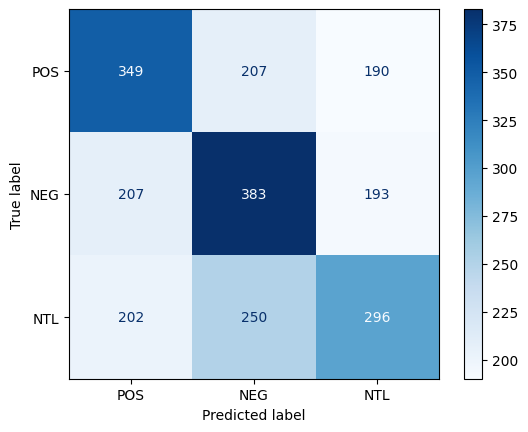

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from groq import Groq
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Here, I am loading the dataset
test_df = pd.read_excel("/content/test_set(1).xlsx", usecols=["Label", "Text"]).head(3000)

# Here, I am setting up the api key
client = Groq(api_key="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")

# Here, I am storing the results in lists
actual_labels = []
predicted_labels = []

# Here, I am doing label mapping for the labels
label_map = {
    "positive": "POS", "pos": "POS",
    "negative": "NEG", "neg": "NEG",
    "neutral": "NTL", "ntl": "NTL"
}

def get_sentiment_prediction(text):
    prompt = f'''Analyze the sentiment of the following text and classify it as 'POS' (Positive), 'NEG' (Negative), or 'NTL' (Neutral).
                Provide only 'POS', 'NEG', or 'NTL' on the first line, followed by a brief explanation on the second line:\n\n{text}'''

    try:
        response = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model="mistral-saba-24b",
            max_tokens=500,
        )
        output_text = response.choices[0].message.content.strip()
        print(f"Output Response: {output_text}")
        predicted_label = output_text.splitlines()[0].strip(' .,*').lower()

        #Here, I am map output to standard labels (POS, NEG, NTL)
        if predicted_label in label_map:
            predicted_label = label_map[predicted_label]
        return predicted_label

    except Exception as e:
        print(f"Error processing text: {e}")
        return ""

# Here, I am processing each row in the dataset
for index, row in test_df.iterrows():
    text = row['Text']
    actual_label = row['Label'].strip().upper()

    predicted_label = get_sentiment_prediction(text)

    if predicted_label == "":
        continue  # Here, I am skipping the  failed predictions

    actual_labels.append(actual_label)
    predicted_labels.append(predicted_label)

    # Here, I am printing the details for each prediction
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {predicted_label}")
    print(f"Actual Sentiment: {actual_label}")
    print('-' * 50)


# Here i am counting total predictions
total_predictions = len(actual_labels)

# Here i am counting correct predictions
correct_predictions = 0
for true_label, classified_label in zip(actual_labels, predicted_labels):
    if true_label == classified_label:
        correct_predictions += 1

#  Here i am calculating accuracy and i am avoiding division by zero
if total_predictions > 0:
    accuracy = (correct_predictions / total_predictions) * 100
else:
    accuracy = 0


print(f"Total Predictions: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Model Accuracy: {accuracy:.2f}%")

#Here I am seeing confusion matrix to see the misclassifications
labels = ["POS", "NEG", "NTL"]
cm = confusion_matrix(actual_labels, predicted_labels, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()